In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Generate Dataset

In [16]:
x1 = np.random.uniform(low=-1.0, high=1.0, size=100)

print(x1.shape)
x1[0:10]

(100,)


array([-0.62856041,  0.89929908,  0.6671378 ,  0.37918954,  0.74637901,
       -0.18291037,  0.29070043, -0.50547968, -0.79256637,  0.27945127])

In [17]:
x2 = np.random.uniform(low=-1.0, high=1.0, size=100)

print(x2.shape)
x2[0:10]

(100,)


array([ 0.32243372, -0.26523025,  0.18539784, -0.24994184, -0.58475057,
       -0.99146115, -0.58583989,  0.0623238 , -0.48968644, -0.97510812])

In [18]:
y = 0.3 * x1 + 0.5 * x2 + 0.1
y = y > 0.0

print(y.shape)
y[0:10]

(100,)


array([ True,  True,  True,  True,  True, False, False, False, False, False], dtype=bool)

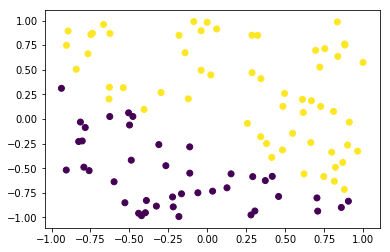

In [19]:
plt.scatter(x1, x2, c=y)

### Define Sigmoid

In [20]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

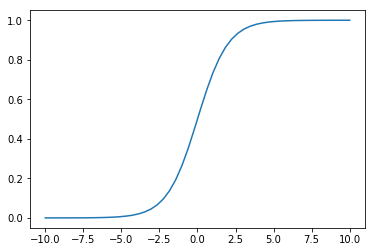

In [21]:
xx = np.linspace(-10, 10)
yy = sigmoid(xx)

plt.plot(xx, yy)

### Gradient Descent

In [22]:
num_epoch = 100
learning_rate = 1.0

w1 = np.random.uniform(low=-1.0, high=1.0)
w2 = np.random.uniform(low=-1.0, high=1.0)
b = np.random.uniform(low=-1.0, high=1.0)

for epoch in range(num_epoch):
    y_predict = w1 * x1 + w2 * x2 + b
    y_predict = sigmoid(y_predict)
    
    predict = y_predict > 0.5
    accuracy = (predict == y).mean()

    if epoch % 10 == 0:
        print("{0:2} accuracy = {1:.6f}".format(epoch, accuracy))
    
    if accuracy > 0.95:
        break

    w1 = w1 - learning_rate * ((y_predict - y) * x1).mean()
    w2 = w2 - learning_rate * ((y_predict - y) * x2).mean()
    b = b - learning_rate * (y_predict - y).mean()

print("----" * 10)
print("w1 = {0:.6f}, w2 = {1:.6f} b = {2:.6f}".format(w1, w2, b))
print("{0:2} accuracy = {1:.6f}".format(epoch, accuracy))

 0 accuracy = 0.420000
10 accuracy = 0.910000
20 accuracy = 0.950000
----------------------------------------
w1 = 1.195327, w2 = 2.240151 b = 0.507277
21 accuracy = 0.960000


In [23]:
import pandas as pd

y_predict = w1 * x1 + w2 * x2 + b
y_predict = sigmoid(y_predict)
y_predict = y_predict > 0.5

result = pd.DataFrame({'x1': x1, 'x2': x2, 'y(actual)': y, 'y(predict)': y_predict})
result.head(10)

,x1,x2,y(actual),y(predict)
0,-0.628560,0.322434,True,True
1,0.899299,-0.265230,True,True
2,0.667138,0.185398,True,True
3,0.379190,-0.249942,True,True
4,0.746379,-0.584751,True,True
5,-0.182910,-0.991461,False,False
6,0.290700,-0.585840,False,False
7,-0.505480,0.062324,False,True
8,-0.792566,-0.489686,False,False
9,0.279451,-0.975108,False,False


### Visualize Decision Boundary

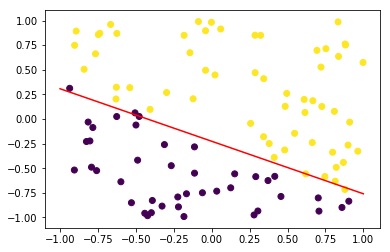

In [28]:
xx = np.linspace(start=-1.0, stop=1.0)
yy = -1.0 * (w1 * xx + b) / w2

plt.scatter(x1, x2, c=y)
plt.plot(xx, yy, c='r')